In [62]:
import itertools
import os
import csv
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmp
#from datetime import datetime
from IPython.display import display
%matplotlib inline
import sys
import seaborn as sns
sys.version

'3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]'

In [2]:
file_train = './/Data//train.csv'
chunksize = 100000
df_train = pd.read_csv(file_train, chunksize=chunksize)
print(df_train.get_chunk().head())
df_train = df_train.get_chunk()

   id        date  store_nbr  item_nbr  unit_sales  onpromotion
0   0  2013-01-01         25    103665         7.0          NaN
1   1  2013-01-01         25    105574         1.0          NaN
2   2  2013-01-01         25    105575         2.0          NaN
3   3  2013-01-01         25    108079         1.0          NaN
4   4  2013-01-01         25    108701         1.0          NaN


In [50]:
chunksize = 10
for chunk in pd.read_csv(file_train, chunksize=chunksize):
    print(chunk)
    test = pd.merge(chunk, df_stores,on = 'store_nbr')
    
    asd=1/0

   id        date  store_nbr  item_nbr  unit_sales  onpromotion
0   0  2013-01-01         25    103665         7.0          NaN
1   1  2013-01-01         25    105574         1.0          NaN
2   2  2013-01-01         25    105575         2.0          NaN
3   3  2013-01-01         25    108079         1.0          NaN
4   4  2013-01-01         25    108701         1.0          NaN
5   5  2013-01-01         25    108786         3.0          NaN
6   6  2013-01-01         25    108797         1.0          NaN
7   7  2013-01-01         25    108952         1.0          NaN
8   8  2013-01-01         25    111397        13.0          NaN
9   9  2013-01-01         25    114790         3.0          NaN


ZeroDivisionError: division by zero

In [54]:
def row_count(filename):
    with open(filename) as in_file:
        return sum(1 for _ in in_file)
b

In [55]:
big_file_rowcount = row_count(file_train)
print(big_file_rowcount)

125497041


In [5]:
fpath = './/Data//stores.csv'
df_stores = pd.read_csv(fpath)
fpath = './/Data//items.csv'
df_items = pd.read_csv(fpath)
fpath = './/Data//transactions.csv'
df_transactions = pd.read_csv(fpath)

fpath = './/Data//oil.csv'
df_oil = pd.read_csv(fpath)

fpath = './/Data//holidays_events.csv'
df_holidays_events = pd.read_csv(fpath)

fpath = './/Data//stores.csv'
df_stores = pd.read_csv(fpath)


In [14]:
df_stores.groupby(['cluster', 'type', 'state']).count()

store_nbr  city
cluster type state                                          
1       D    Guayas                                  2     2
             Santa Elena                             1     1
2       D    Azuay                                   2     2
3       C    El Oro                                  1     1
             Guayas                                  3     3
             Los Rios                                1     1
             Manabi                                  1     1
             Santo Domingo de los Tsachilas          1     1
4       D    El Oro                                  1     1
             Loja                                    1     1
             Santo Domingo de los Tsachilas          1     1
5       A    Pichincha                               1     1
6       B    Azuay                                   1     1
             Guayas                                  1     1
             Pichincha                               3     3
             Santo Domingo de los Tsachilas          1     1
7       C    Chimborazo                              1     1
             Pastaza                                 1     1
8       D    Pichincha                               3     3
9       D    Pichincha                               1     1
             Tungurahua                              1     1
10      B    Los Rios                                1     1
        D    Guayas                                  1     1
        E    Esmeraldas                              1     1
             Guayas                                  3     3
11      A    Manabi                                  1     1
             Pichincha                               2     2
12      C    Pichincha                               1     1
13      D    Manabi                                  1     1
             Pichincha                               3     3
14      A    Pichincha                               3     3
             Tungurahua                              1     1
15      C    Bolivar                                 1     1
             Cotopaxi                                2     2
             Imbabura                                1     1
             Pichincha                               1     1
16      B    Pichincha                               1     1
17      A    Guayas                                  1     1

In [17]:
df_stores.groupby([ 'city', 'type']).count()

store_nbr  state  cluster
city          type                           
Ambato        A             1      1        1
              D             1      1        1
Babahoyo      B             1      1        1
Cayambe       B             1      1        1
Cuenca        B             1      1        1
              D             2      2        2
Daule         D             1      1        1
El Carmen     C             1      1        1
Esmeraldas    E             1      1        1
Guaranda      C             1      1        1
Guayaquil     A             1      1        1
              B             1      1        1
              C             2      2        2
              D             2      2        2
              E             2      2        2
Ibarra        C             1      1        1
Latacunga     C             2      2        2
Libertad      E             1      1        1
Loja          D             1      1        1
Machala       C             1      1        1
              D             1      1        1
Manta         A             1      1        1
              D             1      1        1
Playas        C             1      1        1
Puyo          C             1      1        1
Quevedo       C             1      1        1
Quito         A             6      6        6
              B             3      3        3
              C             2      2        2
              D             7      7        7
Riobamba      C             1      1        1
Salinas       D             1      1        1
Santo Domingo B             1      1        1
              C             1      1        1
              D             1      1        1

In [25]:
store_pivot = df_stores.dropna().pivot("city", "store_nbr", "store_nbr")

In [26]:
store_pivot

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
city,,,,,,,,,,,,,,,,,,,,,
Ambato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN
Babahoyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cayambe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuenca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Carmen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
Esmeraldas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guaranda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guayaquil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN


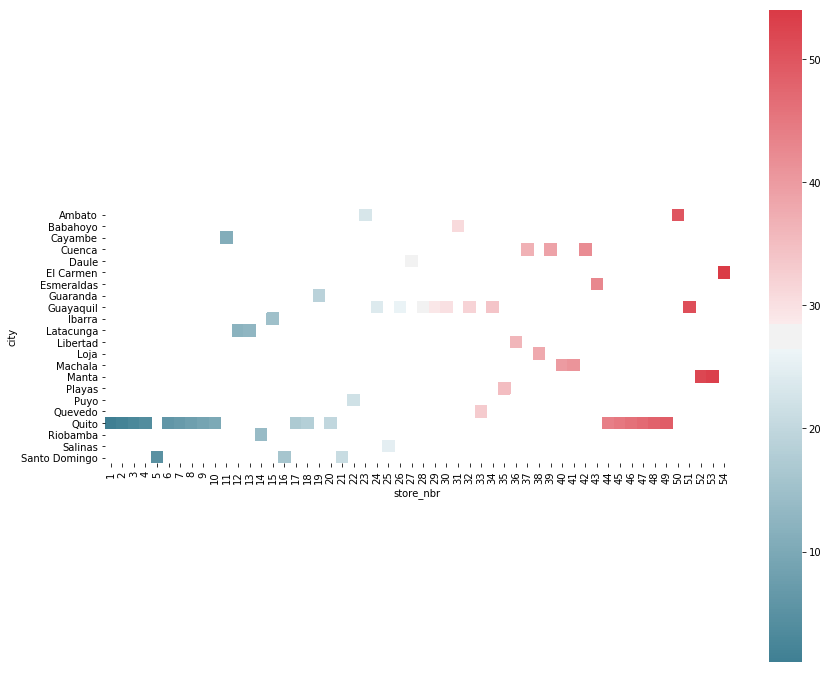

In [27]:
#for regex in var_regex_list:
f, ax = plt.subplots(figsize=(14, 12))
#corr = df.filter(regex=(regex)).corr(method='pearson', min_periods=1)
sns.heatmap(store_pivot, cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [42]:
store_pivot = df_stores.dropna().pivot("city", "store_nbr", "store_nbr")
# df_stores.pivot()
df_stores.pivot_table('store_nbr',  'city', 'cluster', aggfunc='count')


cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
city,,,,,,,,,,,,,,,,,
Ambato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Babahoyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cayambe,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuenca,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daule,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Carmen,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Esmeraldas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guaranda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Guayaquil,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


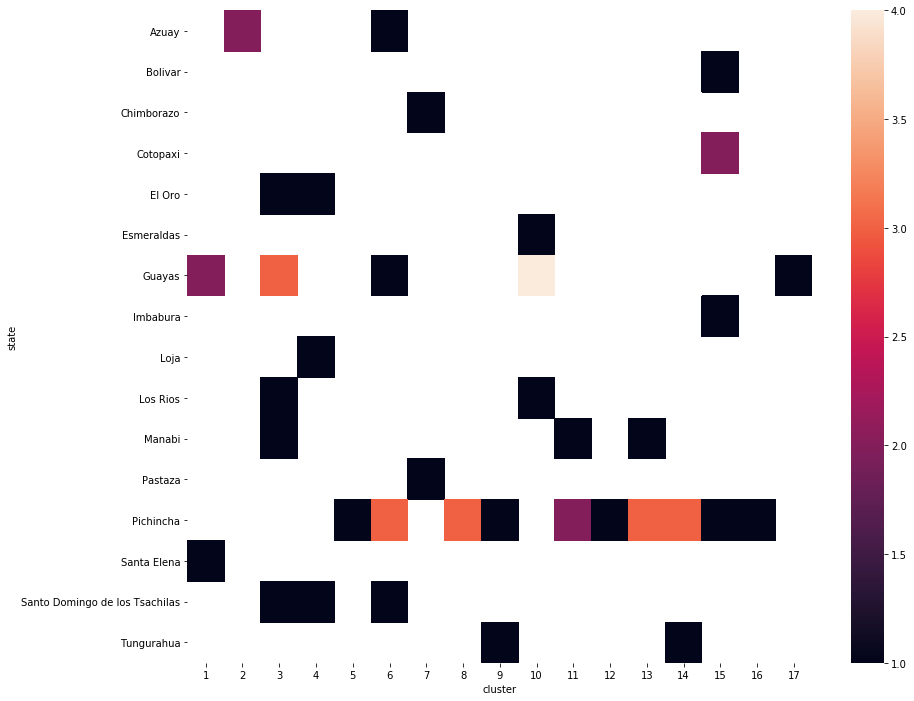

In [47]:
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(df_stores.pivot_table('store_nbr',  'state', 'cluster', aggfunc='count'), ax=ax)

In [45]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [76]:
chunksize = 100
output_path = '.\\Output\\'
#output_path = 'C:\\Users\\ppsheehy\\Documents\\Github\\Projects\\Audi\Output\\'
output_file_name = 'TestOutput.csv'
# count = 0
# dfs = []
# dfs
# ch = pd.read_csv(fpath0, chunksize=chunksize)
# df0  = ch.get_chunk() 

# ch = pd.read_csv(fpath1, chunksize=chunksize)
# df1  = ch.get_chunk() 

# ch = pd.read_csv(fpath2, chunksize=chunksize)
# df2  = ch.get_chunk() 

# ch = pd.read_csv(fpath3, chunksize=chunksize)
# df3  = ch.get_chunk() 
tic = time.time()
ts_variables = ['STROM' ,'SPANNUNG', 'WIDERSTAND']
ts_names = ['Time', 'Step'] + ts_variables
count = 0
file_tic = 0
max_row = 50000

stores = [x for x in df_stores['store_nbr']]
big_file_rowcount = 125497041

file_name_list = [file_train]#, file1, file2, file3] #[file0, file1, file2, file3]
for input_file in file_name_list:
    file_tic = time.time()
    print(input_file)
    #num_rows_in_file = row_count(input_path + input_file)
    for chamber_name in stores:
#     if 1 == 1:
        print('STORE: ', chamber_name)
        with open(output_path + 'Store_'+ str(chamber_name) +'.csv', "w", newline='') as f:
            writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_MINIMAL, escapechar='\\')
            with open(input_file) as fp:
                rdr = csv.reader(fp)
                header = next(rdr)
                #header = remove_BOM_from_cols(header)
                col_dict={}

                writer.writerow(header)

                #header = [h.replace('TIMERNAME', 'SST') for h in header]
                #header = [h.replace('DATETIME', 'DATUM') for h in header]
                for i, c in enumerate(header):
                    col_dict[c] = i
                for count in range(0, min(max_row, big_file_rowcount)-1):
                    count+=1
                    curr_line = next(rdr)
                    if count % 1000 == 0:
                        print('Count = {}'.format(count))
                    row_date = datetime.datetime.strptime(curr_line[col_dict['date']], '%Y-%m-%d')
                    if curr_line[col_dict['store_nbr']] == str(chamber_name) :
#                     if 1 == 1:
#                         if datetime.datetime(2017,6,30) <= row_date <= datetime.datetime(2017,7,7): 
#                         for v in ts_variables:
#                             if v in col_dict:
#                                 raw_ts = curr_line[col_dict[v]].replace(',', '.')
#                                 raw_ts = raw_ts.replace('|', ',')
#                                 curr_line[col_dict[v]] = raw_ts
#                             #print(curr_line[0], curr_line[col_dict['DATUM']])    
                        writer.writerow(curr_line)
    print('file_time ', time.time()-file_tic)
print('Done', time.time()-tic)

.//Data//train.csv
STORE:  1
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count = 30000
Count = 31000
Count = 32000
Count = 33000
Count = 34000
Count = 35000
Count = 36000
Count = 37000
Count = 38000
Count = 39000
Count = 40000
Count = 41000
Count = 42000
Count = 43000
Count = 44000
Count = 45000
Count = 46000
Count = 47000
Count = 48000
Count = 49000
STORE:  2
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000

Count = 48000
Count = 49000
STORE:  13
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count = 30000
Count = 31000
Count = 32000
Count = 33000
Count = 34000
Count = 35000
Count = 36000
Count = 37000
Count = 38000
Count = 39000
Count = 40000
Count = 41000
Count = 42000
Count = 43000
Count = 44000
Count = 45000
Count = 46000
Count = 47000
Count = 48000
Count = 49000
STORE:  14
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Co

Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count = 30000
Count = 31000
Count = 32000
Count = 33000
Count = 34000
Count = 35000
Count = 36000
Count = 37000
Count = 38000
Count = 39000
Count = 40000
Count = 41000
Count = 42000
Count = 43000
Count = 44000
Count = 45000
Count = 46000
Count = 47000
Count = 48000
Count = 49000
STORE:  26
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000

Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count = 30000
Count = 31000
Count = 32000
Count = 33000
Count = 34000
Count = 35000
Count = 36000
Count = 37000
Count = 38000
Count = 39000
Count = 40000
Count = 41000
Count = 42000
Count = 43000
Count = 44000
Count = 45000
Count = 46000
Count = 47000
Count = 48000
Count = 49000
STORE:  38
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 2400

Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count = 30000
Count = 31000
Count = 32000
Count = 33000
Count = 34000
Count = 35000
Count = 36000
Count = 37000
Count = 38000
Count = 39000
Count = 40000
Count = 41000
Count = 42000
Count = 43000
Count = 44000
Count = 45000
Count = 46000
Count = 47000
Count = 48000
Count = 49000
STORE:  50
Count = 1000
Count = 2000
Count = 3000
Count = 4000
Count = 5000
Count = 6000
Count = 7000
Count = 8000
Count = 9000
Count = 10000
Count = 11000
Count = 12000
Count = 13000
Count = 14000
Count = 15000
Count = 16000
Count = 17000
Count = 18000
Count = 19000
Count = 20000
Count = 21000
Count = 22000
Count = 23000
Count = 24000
Count = 25000
Count = 26000
Count = 27000
Count = 28000
Count = 29000
Count 

In [58]:
chamber_name

1

In [64]:
curr_line

['0', '2013-01-01', '25', '103665', '7.0', '']

In [65]:
col_dict

{'date': 1,
 'id': 0,
 'item_nbr': 3,
 'onpromotion': 5,
 'store_nbr': 2,
 'unit_sales': 4}

In [69]:
chamber_name.dtype

dtype('int64')

In [70]:
curr_line[col_dict['store_nbr']]

'25'